# Part1: Data Loading and Cleaning up
The iris flower dataset consists of 150 collected observations for different flower's charachteristics. The dataset contains four attributes. These four attributes help decide which Iris class does the flower belong to. The four attributes are sepal length, sepal width, petal length, and petal width; all in cm. The data set contains 3 classes Iris Setosa, Iris Versicolour, and Iris Virginica. For more info about the dataset, you can chek [this link](https://en.wikipedia.org/wiki/Iris_flower_data_set). The end target of the project will be to build a model that can predict, based on the four attributes, which class does the flower belong to.

In the first part of the project we will start by loading the data and cleaning up any problems within the data. 

- load the Iris dataset using the file iris.data. You can open it with any text editor to find out how it looks like. Decide which separator you would like to use and if any rows needs to be skipped
<br>
Now let's do some exploring
- How many rows and colums are in the file
- How many nulls in the file
- Which rows contains nans and how many nans in each of these rows
- How many nans per columns?
- The 36th sample should be: 4.9,3.1,1.5,0.2,"Iris-setosa" based on the original paper. Is that what you have? If not, fix it
- The 39th sample: 4.9,3.6,1.4,0.1,"Iris-setosa",  where the errors are in the second and third features. Fix it

In [81]:
# import of necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [82]:
# dataset import
names = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']
iris = pd.read_csv('iris_not_clean.data', sep = '|', skiprows = [1,1], names = names, header = None)
iris

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
149,6.7,3.0,5.2,2.3,Iris-virginica
150,6.3,2.5,5.0,1.9,Iris-virginica
151,6.5,3.0,5.2,2.0,Iris-virginica
152,6.2,3.4,5.4,2.3,Iris-virginica


In [83]:
# exploring dataframe shape
iris.shape

(154, 5)

In [85]:
# Counting the number of nulls in the dataset
print(iris.isnull().sum().sum())
print('There are 13 nans in the dataset') 

13
There are 13 nans in the dataset


In [86]:
# Locating the row indexes that contain null values and the total number of nulls appearing in row
iris[iris.isna().any(axis=1)].isnull().sum(axis=1)

28    1
29    5
33    4
45    3
dtype: int64

In [87]:
# Counting the number of nulls appearing in each column
iris.isnull().sum()

sepal length    2
sepal width     2
petal length    3
petal width     3
class           3
dtype: int64

In [88]:
# confirming values in row 36. The value in the 4th position is incorrect
iris.iloc[[36]]

,sepal length,sepal width,petal length,petal width,class
36,4.9,3.1,1.5,0.1,Iris-setosa


In [89]:
# Correcting the value in the 4th column and confirming change
iris.iloc[[36]] = [4.9,3.1,1.5,0.2,"Iris-setosa"]
iris.iloc[[36]]

,sepal length,sepal width,petal length,petal width,class
36,4.9,3.1,1.5,0.2,Iris-setosa


In [90]:
# Confirming values in 39th row. the values in the 2nd and 3rd columns are incorrect
iris.iloc[[39]]

,sepal length,sepal width,petal length,petal width,class
39,4.9,3.1,1.5,0.1,Iris-setosa


In [91]:
# Correcting values and confirming change
iris.iloc[[39]] = [4.9,3.6,1.4,0.1,"Iris-setosa"]
iris.iloc[[39]]

,sepal length,sepal width,petal length,petal width,class
39,4.9,3.6,1.4,0.1,Iris-setosa


# Part 2: Stastical Exploring
In this part we will understand a little more about the data and do some cool plottings
- What is the mean and variance for each column and use the function describe to get insights about the data
- Drop the nan rows
- Recaluclate the mean and variance for each column
- What is the correlation between the fourth column and each of the other three columns individually? Any observations
- How many records exist for each class. # Hint, you can do this in one line by using groupby
- Change the random seed to 1234 and randomly pick 20 samples of the data and display it
- Plot histogram for all the data attributes
- Plot histogram for all the data attributes per class, i.e. grouped by classes

In [92]:
# Converting column 0 to numeric float, coerce used to treat values presenting errors as null
iris['sepal length'] = pd.to_numeric(iris['sepal length'], errors= 'coerce')

In [93]:
iris.drop(['class'],axis=1).mean(axis = 0)

sepal length    5.833775
sepal width     3.060526
petal length    3.746358
petal width     1.192715
dtype: float64

In [94]:
# Calculating mean and variance of our columns. .drop() used to ignore column containing strings
iris.drop(['class'],axis=1).var(axis = 0)


sepal length    0.694918
sepal width     0.188365
petal length    3.116903
petal width     0.583747
dtype: float64

In [95]:
# Using Describe function to explore dataset
iris.describe()

,sepal length,sepal width,petal length,petal width
count,151.000000,152.000000,151.000000,151.000000
mean,5.833775,3.060526,3.746358,1.192715
std,0.833618,0.434011,1.765475,0.764033
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.325000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [96]:
# Dropping NAs
iris = iris.dropna()

In [97]:
# Recalculating mean and variance for data columns
print(iris.drop(['class'],axis=1).mean(axis = 0))
print(iris.drop(['class'],axis=1).var(axis = 0))
print('After dropping NAs, the was only a slight change to both the mean and variance for each column')

sepal length    5.838000
sepal width     3.057333
petal length    3.757333
petal width     1.199333
dtype: float64
sepal length    0.696868
sepal width     0.189979
petal length    3.119510
petal width     0.581006
dtype: float64
After dropping NAs, the was only a slight change to both the mean and variance for each column


In [99]:
# Correlations matrix to confirm correlation between variables
print(iris.corr())
print('Looking at the correlation between petal width and the other variables is strongly correlated to the length variable, but has a weak negative correlation with sepal width.')

              sepal length  sepal width  petal length  petal width
sepal length      1.000000    -0.121680      0.873529     0.819789
sepal width      -0.121680     1.000000     -0.428517    -0.366126
petal length      0.873529    -0.428517      1.000000     0.962865
petal width       0.819789    -0.366126      0.962865     1.000000
Looking at the correlation between petal width and the other variables is strongly correlated to the length variable, but has a weak negative correlation with sepal width.


In [100]:
# Grouping by class and counting frequencies for each
iris.groupby('class')['class'].count()


class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

In [101]:
# Calling seed 1234 and creating a random sample of 20 observations
np.random.seed(1234)
iris.sample(n=20)

,sepal length,sepal width,petal length,petal width,class
95,6.1,3.0,4.6,1.4,Iris-versicolor
67,6.1,2.9,4.7,1.4,Iris-versicolor
107,6.3,2.9,5.6,1.8,Iris-virginica
6,4.6,3.4,1.4,0.3,Iris-setosa
63,5.2,2.7,3.9,1.4,Iris-versicolor
31,4.8,3.1,1.6,0.2,Iris-setosa
27,5.2,3.5,1.5,0.2,Iris-setosa
38,5.5,3.5,1.3,0.2,Iris-setosa
103,5.7,2.8,4.1,1.3,Iris-versicolor
126,7.7,2.8,6.7,2.0,Iris-virginica


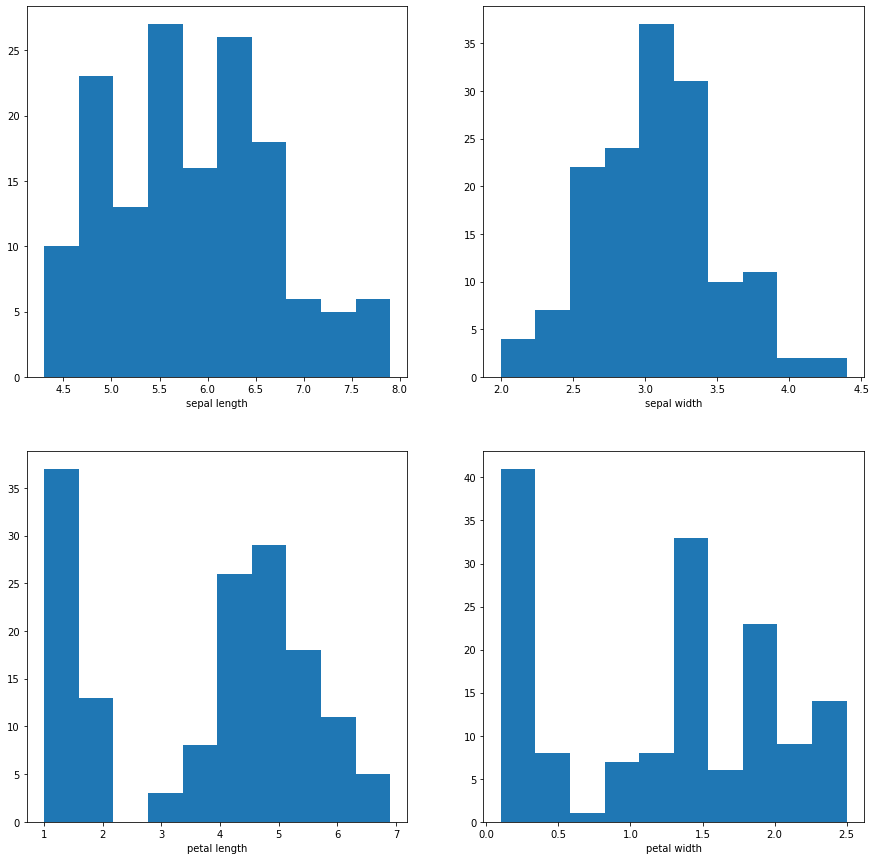

In [102]:
# Creating a postiion variable for use in for loop that will create plots
position = 1

# Using matplotlib's figure(figsize) to create the figure/frame/size parameters of our graph outside of for loop to avoid redundancies
plt.figure(figsize=(15,15))

# For loop iterating through columns. If statement used to exclude class column
for i in iris:
    if iris[i].dtype == 'float64':
        plt.subplot(2,2,position);
        plt.hist(iris[i])
        plt.xlabel(i)
        
# Position variable updated to rotate plot positioning
    position = position + 1

class
Iris-setosa        [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
Iris-versicolor    [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
Iris-virginica     [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
dtype: object

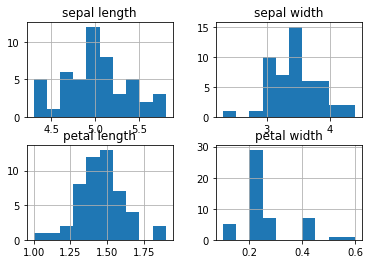

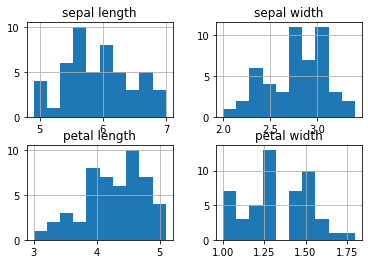

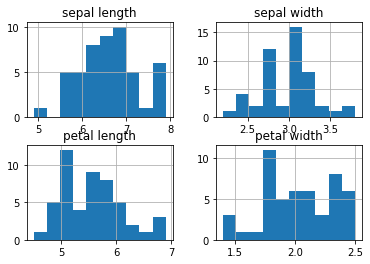

In [103]:
# Creating plot for each attribute grouped by class type
iris.groupby('class').hist()


Part 4

# Part 4: Machine Learning
In this part, you will explore the use of supervised and non supervised learning

### Non-Supervised Learning 
- using Kmeans, divide the data into different clusters. The number of clusters should be the same as the number of categories you have in the data
- Do scatter plot for each two combination of the three dimensions together (0 vs 1), (0 vs 2), (1 vs 2). Use the kmeans labels to color the points in the scatter plots

In [104]:
# importing kmeans to use in cluster model
from sklearn.cluster import KMeans
# Building Cluster Model
n_clusters = 3 #Building model in these two lines
kmeans = KMeans(n_clusters)
# Fitting model to the data and creating our clusters
kmeans.fit(iris.drop(['class'],axis=1)) #fitting model to our data

KMeans(n_clusters=3)

[[5.9016129  2.7483871  4.39354839 1.43387097]
 [4.99       3.428      1.46       0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


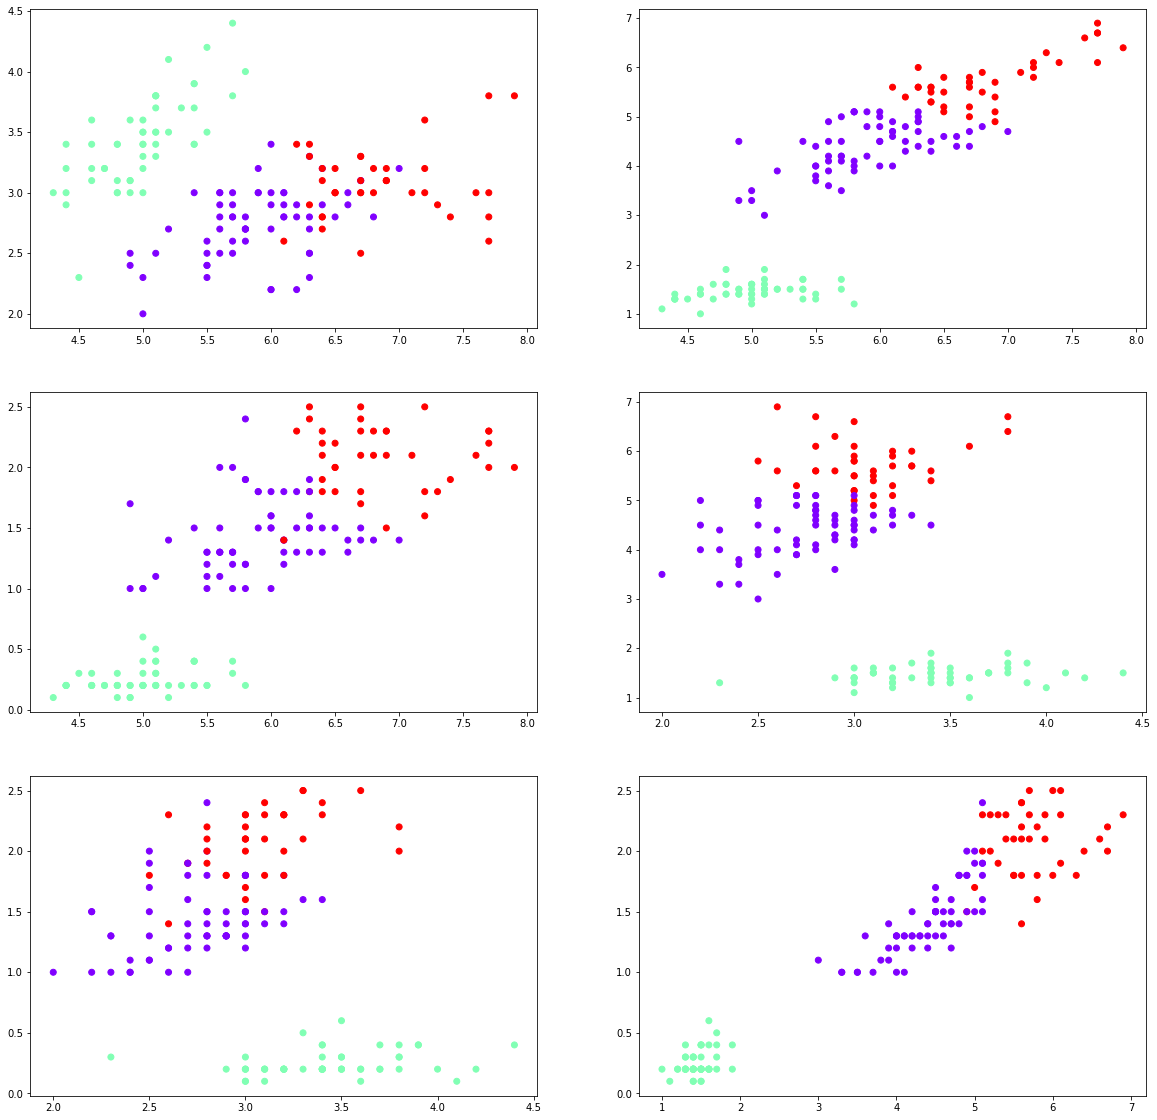

In [105]:
# Showing our cluster centers and lables 
print(kmeans.cluster_centers_)  
print(kmeans.labels_)  

#Creating plot figure to display our clusters
plt.figure(figsize=(20,20))

# plotting clusters for each attribute combination. Using subplot to show each plot on same display
plt.subplot(3,2,1);
plt.scatter(iris['sepal length'],iris['sepal width'], c=kmeans.labels_, cmap='rainbow')
plt.subplot(3,2,2);
plt.scatter(iris['sepal length'],iris['petal length'], c=kmeans.labels_, cmap='rainbow')
plt.subplot(3,2,3);
plt.scatter(iris['sepal length'],iris['petal width'], c=kmeans.labels_, cmap='rainbow')
plt.subplot(3,2,4);
plt.scatter(iris['sepal width'],iris['petal length'], c=kmeans.labels_, cmap='rainbow')
plt.subplot(3,2,5);
plt.scatter(iris['sepal width'],iris['petal width'], c=kmeans.labels_, cmap='rainbow')
plt.subplot(3,2,6);
plt.scatter(iris['petal length'],iris['petal width'], c=kmeans.labels_, cmap='rainbow')


### Supervised-Learning
- Divide your dataset to 80% training and 20% validation
- Build a Logistci regression model for the reduced IRIS dataset
- What is the training accuracy
- What is the validation accuracy
- Form the confusion matrix

In [114]:
# Creating x and y variables to separate our class variable values from the attribute variables
x = iris.iloc[:, [0,1,2, 3]].values
y = iris.iloc[:, 4].values

In [115]:
# Importing train_test_split to create our training and validation sets
from sklearn.model_selection import train_test_split
# Creating our validation and training sets. 20% of total sample is reserved for validation sets
x_train, x_test,y_train,y_test = train_test_split(x,y , test_size = 0.2)

In [116]:
# Import of logistic regression from sklearn
from sklearn.linear_model import LogisticRegression

# Creating model then fitting to our training set
logistic_regress = LogisticRegression()

logistic_regress.fit(x_train,y_train)

LogisticRegression()

In [117]:
# Creating predictions and storing in forecast variable
forecast = logistic_regress.predict(x_test)

In [118]:
# Checking accuracy of our training model
score1 = logistic_regress.score(x_train, y_train)
print(score1)

0.975


In [119]:
# Checking accuracy of our test model
score = logistic_regress.score(x_test, y_test)
print(score)

0.9666666666666667


In [120]:
# Importing metrics from sklearn
from sklearn import metrics
# Creating our confusion matrix to further display model accuracy
cm = metrics.confusion_matrix(y_test, forecast)
print(cm)

[[12  0  0]
 [ 0  9  1]
 [ 0  0  8]]
